In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

import sys

from src.neuralNetwork.error import SquaredError

sys.path.append('../') #server per fare l'import di file in un'altra directory sullo stesso "livello"
from src.neuralNetwork.NeuralNetwork import Layer, NeuralNetwork
from src.neuralNetwork.function import IdentityFunction, ReLuFunction, SigmoidFunction, TanhFunction
import keras.backend as K
import numpy as np

In [2]:
X = torch.rand(100, 2)
y = X*2
learning_rate = 0.001
momentum_term = 0
regularization_term = 0

epoch = 100

In [3]:
from keras.layers import Dense
from keras.optimizers import SGD
from keras import Sequential, regularizers
import keras

# Definizione del modello sequenziale di Keras
model = Sequential()

# Aggiunta dei layer della rete neurale
model.add(Dense(2, input_dim=2, activation='relu', kernel_regularizer=regularizers.l2(regularization_term)))
model.add(Dense(3, activation='relu', kernel_regularizer=regularizers.l2(regularization_term)))
model.add(Dense(2, activation='linear', kernel_regularizer=regularizers.l2(regularization_term)))
model.add(Dense(2, activation='linear', kernel_regularizer=regularizers.l2(regularization_term)))

sgd = SGD(learning_rate=learning_rate, momentum=momentum_term, nesterov=False)

def custom_loss(target_output, output_nn):
    error_vector = K.square(target_output - output_nn) / 2
    error_total = K.sum(error_vector)
    return error_total

In [4]:
layer1 = Layer(num_neurons=2, num_inputs=2, activation_function=ReLuFunction())
layer2 = Layer(num_neurons=3, num_inputs=2, activation_function=ReLuFunction())
layer3 = Layer(num_neurons=2, num_inputs=3, activation_function=IdentityFunction())
layer4 = Layer(num_neurons=2, num_inputs=2, activation_function=IdentityFunction())

layer1.weights = np.matrix(model.layers[0].get_weights()[0].T).copy()
layer2.weights = np.matrix(model.layers[1].get_weights()[0].T).copy()
layer3.weights = np.matrix(model.layers[2].get_weights()[0].T).copy()
layer4.weights = np.matrix(model.layers[3].get_weights()[0].T).copy()

layer1.biases = np.matrix(model.layers[0].get_weights()[1].T).copy()
layer2.biases = np.matrix(model.layers[1].get_weights()[1].T).copy()
layer3.biases = np.matrix(model.layers[2].get_weights()[1].T).copy()
layer4.biases = np.matrix(model.layers[3].get_weights()[1].T).copy()

neuralNetwork = NeuralNetwork([layer1, layer2, layer3, layer4])

In [209]:
model.compile(loss=custom_loss, optimizer=sgd, metrics=['MSE'])

target_inputs =  np.matrix(X.numpy()).copy()
target_outputs = np.matrix(y.numpy()).copy()
history = model.fit(target_inputs, target_outputs, batch_size=len(target_inputs), epochs=epoch, shuffle=False)

Epoch 1/100
1/1 [==============================] - 1s 745ms/step - loss: 131.2594 - MSE: 1.3126
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 97.7359 - MSE: 0.9774
Epoch 3/100
1/1 [==============================] - 0s 0s/step - loss: 77.4184 - MSE: 0.7742
Epoch 4/100
1/1 [==============================] - 0s 0s/step - loss: 63.7176 - MSE: 0.6372
Epoch 5/100
1/1 [==============================] - 0s 0s/step - loss: 54.0820 - MSE: 0.5408
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 47.2412 - MSE: 0.4724
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 42.4170 - MSE: 0.4242
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 38.9796 - MSE: 0.3898
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 36.5226 - MSE: 0.3652
Epoch 10/100
1/1 [==============================] - 0s 0s/step - loss: 34.8000 - MSE: 0.3480
Epoch 11/100
1/1 [==============================] - 0s 16ms/step - 

In [210]:
target_inputs =  np.matrix(X.numpy()).copy()
target_outputs = np.matrix(y.numpy()).copy()
error_history, _ = neuralNetwork.train(target_inputs, target_outputs, learning_rate=learning_rate,
                                    regularization_term=regularization_term, momentum_term = momentum_term, epochs=epoch)

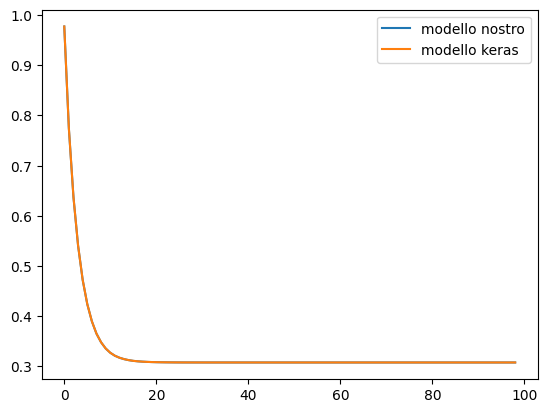

In [211]:
plt.plot(error_history[0:epoch-1], label='modello nostro')
plt.plot(history.history["MSE"][1:], label='modello keras')
plt.legend()

In [212]:
diff = np.array(error_history[0:epoch-1]) - np.array(history.history["MSE"][1:])
if np.all(np.abs(diff) < 0.0001):
    print("Test passato")
else:
    print("Test fallito")

Test passato
